# Full fledge neural net with hyperparameter and droput

In [1]:
import numpy as np 

In [2]:
class DeepNeuralNetwork:
    def __init__(self,input_size,output_size,hidden_size,epoches=1000,learning_rate=0.001,dropout=0.5,hidden_layers=2):
        self.input_size = input_size 
        self.output_size = output_size
        self.hidden_size = hidden_size 
        self.learning_rate = learning_rate 
        self.dropout = dropout 
        self.hidden_layers = hidden_layers 
        self.epoches = epoches

        self.hidden_weights = [np.random.randn(self.input_size,self.hidden_size)* np.square(2/self.input_size)]
        self.hidden_bias = [np.zeros((1,self.hidden_size))]
        
        for _ in range(self.hidden_layers): 
            self.hidden_weights.append(np.random.randn(self.hidden_size,self.hidden_size) * np.square(2/self.input_size))
            self.hidden_bias.append(np.zeros((1,self.hidden_size)))
        
        self.output_weight = np.random.randn(self.hidden_size,self.output_size)
        self.output_bias = np.zeros((1,self.output_size))

    def sigmoid(self,z):
        return (1/(1+np.exp(-z)))
    
    def derivative_sigmoid(self,z):
        s = self.sigmoid(z)
        return s * (1-s)
    
    def Relu(self,z):
        return np.maximum(0,z)

    def derivative_relu(self,z):
        return (z > 0 ).astype(float)
    
    def compute_loss(self,preds,Y):
        preds = np.clip(preds,1e-8,1-1e-8) 
        return -np.mean(Y*np.log(preds)+(1-Y)*np.log(1-preds)) 
    
    def Dropout(self,A):
        mask = np.random.rand(*A.shape) < self.dropout
        return (mask * A ) / self.dropout
    
    def ForwardPropagation(self,X):
        self.Activations = [X]
        self.hidden_Z = []

        for l in range(self.hidden_layers):
            Z = np.dot(self.Activations[l],self.hidden_weights[l]) + self.hidden_bias[l] 
            self.hidden_Z.append(Z)
            A = self.Relu(Z) 
            self.Activations.append(self.Dropout(A))

        self.output_Z = np.dot(self.Activations[-1],self.output_weight) + self.output_bias 
        self.output_A = self.sigmoid(self.output_Z) 
        return self.output_A

    def BackPropagation(self,X,Y):
        m = X.shape[0]

        error = self.output_A - Y 
        Dwo = 1/m * np.dot(self.Activations[-1].T,error)
        Dbo = 1/m * np.sum(error) 

        self.output_weight =  self.output_weight - self.learning_rate * Dwo
        self.output_bias = self.output_bias - self.learning_rate * Dbo 

        for l in reversed(range(self.hidden_layers)):
            
            da = np.dot(error,self.output_weight.T if l == self.hidden_layers-1 else self.hidden_weights[l+1].T)
            dz = da * self.derivative_relu(self.hidden_Z[l]) # final errors 

            dw = 1/m * np.dot(self.Activations[l].T,dz)
            db = 1/m * np.sum(dz)
            error = dz 

            self.hidden_weights[l] = self.hidden_weights[l] - self.learning_rate * dw 
            self.hidden_bias[l] = self.hidden_bias[l] - self.learning_rate * db  

    def fit(self,X,Y):
        Y = np.array(Y).reshape(-1,1)
        for epoch in range(self.epoches):
                preds_F = self.ForwardPropagation(X)
                loss = self.compute_loss(preds_F,Y)
                print(f"epoch : {epoch+1}, loss : {loss}")
                self.BackPropagation(X,Y)

    def predict(self,X):
        return (self.ForwardPropagation(X) > 0.5).astype(int)


In [3]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd 
dataset = pd.read_csv("../BankNote_Authentication.csv")
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
Y = np.array(dataset['class']).reshape(-1,1)
X = np.array(dataset.drop(columns=['class']))
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

print(Y_train.shape)

(1029, 1)


In [5]:
model = DeepNeuralNetwork(
    input_size=4,
    output_size=1,
    hidden_size=16,
    epoches=1000,
    learning_rate=0.001,
    dropout=0.8,
    hidden_layers=4
)

model.fit(X_train,Y_train)
preds = model.predict(X_test)

epoch : 1, loss : 1.2792504663329718
epoch : 2, loss : 1.2314376243041032
epoch : 3, loss : 1.3006223038444984
epoch : 4, loss : 1.2203110734415454
epoch : 5, loss : 1.2142525152371864
epoch : 6, loss : 1.246200205045712
epoch : 7, loss : 1.1720346168953786
epoch : 8, loss : 1.1939521298107185
epoch : 9, loss : 1.0952274519207967
epoch : 10, loss : 1.1894615967985167
epoch : 11, loss : 1.1486202222728061
epoch : 12, loss : 1.202539944648462
epoch : 13, loss : 1.1924041366507938
epoch : 14, loss : 1.136154391755598
epoch : 15, loss : 1.104259753562609
epoch : 16, loss : 1.1954462641977706
epoch : 17, loss : 1.1985720021074073
epoch : 18, loss : 1.2444686869124832
epoch : 19, loss : 1.120915316805712
epoch : 20, loss : 1.1283629043358083
epoch : 21, loss : 1.0416028277844622
epoch : 22, loss : 1.1445422197371147
epoch : 23, loss : 1.0461343925890583
epoch : 24, loss : 1.165013224330579
epoch : 25, loss : 1.0859687496153203
epoch : 26, loss : 1.1383344666600572
epoch : 27, loss : 1.172516

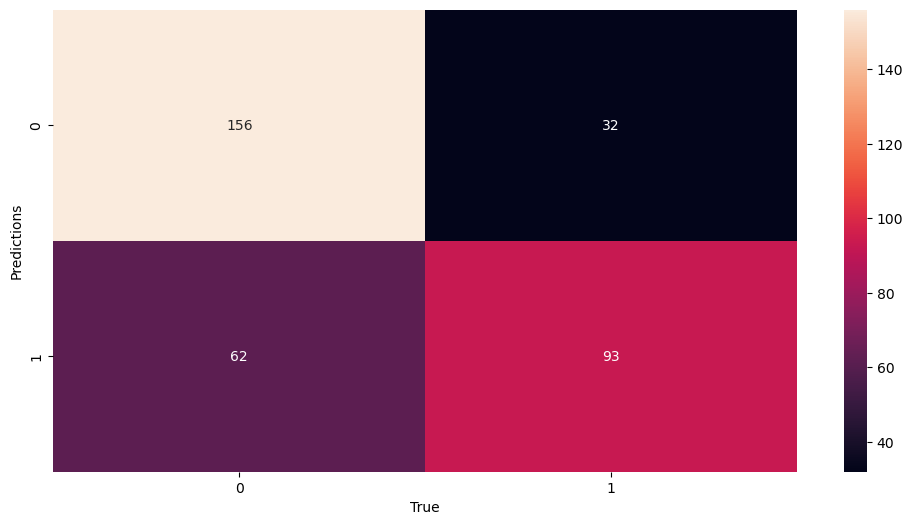

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       188
           1       0.74      0.60      0.66       155

    accuracy                           0.73       343
   macro avg       0.73      0.71      0.72       343
weighted avg       0.73      0.73      0.72       343



In [6]:
from sklearn.metrics import classification_report
cmf = confusion_matrix(Y_test,preds)

plt.figure(figsize=(12,6))
sns.heatmap(cmf,annot=True,fmt='d')
plt.xlabel("True")
plt.ylabel("Predictions")
plt.show()
print(classification_report(Y_test,preds))

In [ ]:
print(np.random.randint())

[3 3 2 1 3]
